# A Crash Course in Applied Linear Algebra
Patrick Landreman | Spry Health

### Motivation - Why should you listen to me?

Since we are all busy people with too much to do, why should you spend your precious time reading this notebook? I'd like to give you a sample of the kind of power you'll have by the end.

Consider the following time series plot:

<img src='img/intro_system_ringing.png'>

This could be the value of a stock price, or the position of an aircraft, or some biological signal, or any number of things. You are tasked with predicting the value at some future time. Looks unpleasant, no? Maybe there is some periodicity emerging by the end, but surely this is not a trivial task.

Now suppose you know that the series above was a mixture of a number of much simpler functions, and you could tell the amount of each function:

<img src='img/intro_system_modes.png'>

Predicting how each of these functions will evolve should be a much simpler task. The question is - how do you find these simpler functions, and how do you find the weight of each function?

Perhaps more interesting, suppose the system above comes from a robotic arm which can move in a 2D plane. The time series corresponds to the position of the end of the arm in one direction - we kicked the system, which caused some shaking and oscillating that subsides over time. 

We'll describe the complete position with a pair of numbers, $(y_1, y_2)$. We also can control our robot with some inputs, $(u_1, u_2)$. If we wanted to drive the arm to a specific location, say $(y_1, y_2) = (0.2, -0.2)$, we can expect that the arm will move, and then because of momentum or other issues the system might overshoot a bit and take some time to stabilize (this is exactly the kind of thing that happens with the read head in a spinning-disk hard drive, for instance). The next image shows what happens if at 50 seconds we apply a specific set of inputs to reach the target:

<img src='img/intro_naive_control.png'>

Ok, we get there after ~3000 seconds, but it takes a while for the ringing to settle down.

Instead, however, it is possible to choose a more complicated sequence of inputs that brings the arm to the target in **exactly** a specified amount of time:

<img src='img/intro_least_norm_control.png'>

Here, the arm reaches the specified coordinates at 800 seconds and remains there, perfectly stable. From looking at the sequence of inputs, there is **no way** a human could intuit the sequence.

This is just one of the kinds of problems I hope to expose you to today.

### Acknowledgements

*This presentation is dedicated to Prof. Stephen Boyd and Prof. Sanjay Lall, who first exposed me to this way of seeing the world. Many of the ideas I present here were inspired largely by them and their teachers, and they deserve credit for the enormous amount of work they have done.*

*If this subject interests you, I* strongly *suggest exploring their books and lecture series on YouTube.*

### Spry Health

* First **FDA-cleared**, wrist worn pulse oximeter and respiration rate monitor
* Building the first dataset of **continuous vital signs** for persons with chronic illnesses

<img src='img/Loop-left-shad.png' style='height: 300px'>

www.spryhealth.com

### Why Linear Algebra?

<center>
$
\begin{equation*}
y = Ax
\end{equation*}
$
</center>

The world of Engineering is riddled with Matrices. Matrix math forms the foundation of virtually every tool in our algorithmic utility belt. You essentially can't get through a research paper in our domain without needing to understand the properties of matrices. But it's not just in signal processing and machine learning! Matrix algebra is foundational across virtually every discipline you can think of, from Physics to Finance.

The truly amazing part is, there is a finite number of properties of matrices that are the same, regardless of which discipline you are coming from. If you can squeeze a problem into this form, then you can just pull out your bag of Linear Algebra tricks and instantly understand your problem in an efficient, elegant way.

### Where do matrices come from?

A system of linear equations

<center>
$
\begin{align*}
    y_1 &= a_{1,1}x_1 + a_{1,2}x_2 + a_{1,3}x_3 + \ldots + a_{1,n}x_{n} \\
    y_2 &= a_{2,1}x_1 + a_{2,2}x_2 + a_{2,3}x_3 + \ldots + a_{2,n}x_{n} \\
    \vdots \\
    y_m &= a_{m,1}x_1 + a_{m,2}x_2 + a_{m,3}x_3 + \ldots + a_{m,n}x_{n} \\
\end{align*}
$
</center>
  
can be re-written as 
    
<center>
$
\begin{bmatrix}
y_1  \\
y_2  \\
\vdots  \\
y_m
\end{bmatrix}
=
\begin{bmatrix}
a_{1,1} & a_{1,2} & a_{1,3} & \ldots & a_{1,m} \\
a_{2,1} & a_{2,2} & a_{2,3} & \ldots & a_{2,m} \\
\vdots \\
a_{n,1} & a_{n,2} & a_{n,3} & \ldots & a_{n,m} \\
\end{bmatrix}
\begin{bmatrix}
x_1  \\
x_2  \\
\vdots  \\
x_m
\end{bmatrix}
$
</center>

which we simplify as

<center>
$y=Ax$
</center>


We say that 

$y \in \mathbb{R}^m$  
$x \in \mathbb{R}^n$  
$A \in \mathbb{R}^{n,m}$

...but of course these could also be complex.

### Examples

#### Classical Mechanics

<img src='img\rigid_body.png' style='height: 300px'>

* $x$ represents a series of forces being applied at different points
* $y$ represents the net force and torque on the total body
* $\mathbf{A}$ is determined by the geometry of the system

In [388]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [391]:
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (10, 3)

In [3]:
np.random.seed(0)

### Markov Processes

In [151]:
P = np.array([[0, 1, 0],
              [0, 0, 1],
              [1, 0, 0]])

λ, v = np.linalg.eig(P)

In [152]:
λ

array([-0.5+0.8660254j, -0.5-0.8660254j,  1. +0.j       ])

In [167]:
v

array([[ 0.57735027+0.j ,  0.57735027-0.j , -0.57735027+0.j ],
       [-0.28867513+0.5j, -0.28867513-0.5j, -0.57735027+0.j ],
       [-0.28867513-0.5j, -0.28867513+0.5j, -0.57735027+0.j ]])

In [178]:
a = v[:, 2]
b = np.sum(np.abs(a))
θ = np.angle(a/b)
c = 1/b * np.exp(-1j * θ)

np.round((a * c), 2)

array([0.33+0.j, 0.33+0.j, 0.33+0.j])

In [182]:
q = v[:, 1] + np.ones(3) / 3.
q /= q[0]
q

array([1.        +0.j        , 0.04903811-0.54903811j,
       0.04903811+0.54903811j])

In [183]:
v[:, 0] / v[0, 0]

array([ 1. +0.j       , -0.5+0.8660254j, -0.5-0.8660254j])

In [213]:
# Construct an example where all the non-unity eigenvalues are associated with decaying exponentials

D = np.array([[1, 0.05, 0.0],
              [0, 0.95, 0.2],
              [0, 0.00, 0.8]])

λ, v = np.linalg.eig(D)

In [214]:
λ

array([1.  , 0.95, 0.8 ])

In [215]:
v

array([[ 1.        , -0.70710678,  0.19611614],
       [ 0.        ,  0.70710678, -0.78446454],
       [ 0.        ,  0.        ,  0.58834841]])

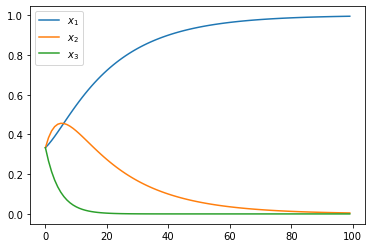

In [218]:
# Simulate the evolution of the system, starting from a uniform state
T = 100
x = np.ones((3, T)) / 3.

for t in np.arange(1, T):
    x[:, t] = D @ x[:, t-1]

plt.figure()
plt.plot(x.T)
plt.legend(labels=['$x_1$', '$x_2$', '$x_3$'])
plt.show()

### Matrix Factorization

In [321]:
m, n = 100, 60
r = 3

# Create a few latent factors
P = np.empty((m, r))
Q = np.empty((r, n))

x = np.arange(m)  # index position of factors in P
y = np.arange(n)  # index position of factors in Q

for i in range(r):
    P[:, i] = np.cos(2*np.pi*x / (m//((i+1))))
    Q[i, :] = np.sin(2*np.pi*y / (n//((i+1))))
#     Q[i, :] = np.roll(np.blackman(n), i*n//r)
    
# Normalize the factors
P /= np.linalg.norm(P, axis=0)
Q = (Q.T / np.linalg.norm(Q, axis=1)).T

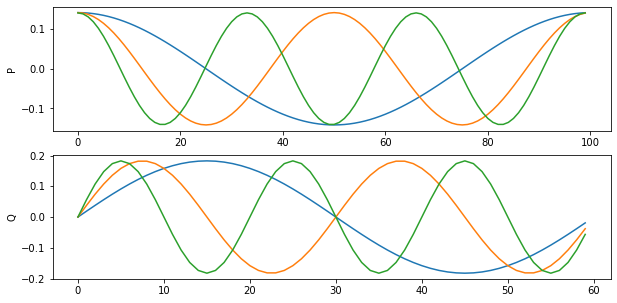

In [322]:
fig, (P_ax, Q_ax) = plt.subplots(2, figsize=(10, 5))

for i in range(r):
    P_ax.plot(P[:, i])
    Q_ax.plot(Q[i, :])
    
P_ax.set_ylabel('P')
Q_ax.set_ylabel('Q')
plt.show()

In [323]:
# Specify the singular values
Σ = np.diag([0.9, 0.8, 0.7])

In [324]:
A = P @ Σ @ Q
A

array([[ 0.        ,  0.01228106,  0.02380381, ..., -0.03387169,
        -0.02380381, -0.01228106],
       [ 0.        ,  0.01214197,  0.023537  , ..., -0.03349885,
        -0.023537  , -0.01214197],
       [ 0.        ,  0.01172889,  0.02274455, ..., -0.03239141,
        -0.02274455, -0.01172889],
       ...,
       [ 0.        ,  0.01153836,  0.02237103, ..., -0.03184968,
        -0.02237103, -0.01153836],
       [ 0.        ,  0.01202655,  0.02331073, ..., -0.0331707 ,
        -0.02331073, -0.01202655],
       [ 0.        ,  0.0122424 ,  0.02372803, ..., -0.03376178,
        -0.02372803, -0.0122424 ]])

In [325]:
A.min(), A.max()

(-0.05064148963559829, 0.05064148963559827)

In [326]:
A -= A.min()
A *= 5 / A.max()
A = A.astype(int)

In [327]:
A

array([[2, 3, 3, ..., 0, 1, 1],
       [2, 3, 3, ..., 0, 1, 1],
       [2, 3, 3, ..., 0, 1, 1],
       ...,
       [2, 3, 3, ..., 0, 1, 1],
       [2, 3, 3, ..., 0, 1, 1],
       [2, 3, 3, ..., 0, 1, 1]])

In [328]:
A = (A - 2.5) / 5

U, Σ, Vt = np.linalg.svd(A, full_matrices=False)
print('U:', U.shape)
print('S:', Σ.shape)
print('Vt:', V.shape)

U: (100, 60)
S: (60,)
Vt: (6, 6)


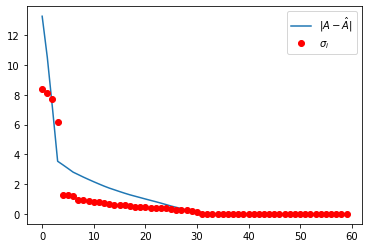

In [329]:
errors = []

for _r in range(len(Σ)):
    A_hat = U[:, :_r+1] @ np.diag(Σ[:_r+1]) @ Vt[:_r+1, :]
    error = np.linalg.norm(A - A_hat)# / (m*n)
    errors.append(error)

plt.plot(errors, label='$|A - \hat{A}|$')
plt.plot(Σ, marker='o', color='r', lw=0, label='$\sigma_i$')

plt.legend()
plt.show()

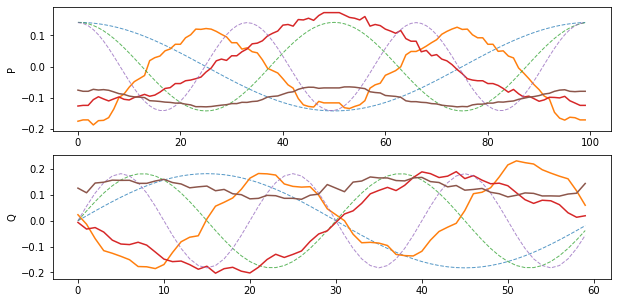

In [334]:
P_hat = U
Q_hat = Vt

fig, (P_ax, Q_ax) = plt.subplots(2, figsize=(10, 5))

for i in range(r):
    P_ax.plot(P[:, i], ls='--', alpha=0.75, lw=1)
    Q_ax.plot(Q[i, :], ls='--', alpha=0.75, lw=1)
    
    P_ax.plot(P_hat[:, i])
    Q_ax.plot(Q_hat[i, :])
    
P_ax.set_ylabel('P')
Q_ax.set_ylabel('Q')
plt.show()

### Document Search

In [415]:
words = np.array([
    'drums',
    'piano',
    'chords',
    'bayesian',
    'matrix',
    'coefficient',
    'fluffy',
    'meow'
])

titles = np.array([
    'Music Theory for Beginners',
    'A History of Jazz',
    'Beethoven vs. Mechagodzilla',
    'Elements of Statistical Learning',
    'Finite Element Methods: the Hottest Trends',
    'Introduction to Linear Algebra',
    '10 Fluffy Cats you need to see RIGHT NOW!!!',
    'The Lost Art of Grooming',
    'Piano Cat Strikes Again'
])

word_counts = [
    [ 5, 5,  2, 0, 0, 0,  0,  0],
    [10, 3,  6, 0, 0, 0,  0,  0],
    [ 0, 8, 12, 0, 0, 0,  0,  0],
    [ 0, 0,  0, 5, 6, 4,  0,  0],
    [ 0, 0,  0, 9, 4, 4,  0,  0],
    [ 0, 0,  0, 2, 5, 6,  0,  0],
    [ 0, 0,  0, 0, 0, 0, 10, 10],
    [ 0, 0,  0, 0, 0, 0,  4,  5],
    [ 0, 2,  0, 0, 0, 0,  5, 11]
]

A = np.array(word_counts).T
m, n = A.shape

A

array([[ 5, 10,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  3,  8,  0,  0,  0,  0,  0,  2],
       [ 2,  6, 12,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  5,  9,  2,  0,  0,  0],
       [ 0,  0,  0,  6,  4,  5,  0,  0,  0],
       [ 0,  0,  0,  4,  4,  6,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 10,  4,  5],
       [ 0,  0,  0,  0,  0,  0, 10,  5, 11]])

In [399]:
# Normalize the columns to remove the effect of word counts from each document
A_norm = A / A.sum(axis=0)

# Perform the Singular Value Decomposition
U, Σ, Vt = np.linalg.svd(A_norm)

print('U:', U.shape)
print('S:', Σ.shape)
print('Vt:', V.shape)

U: (8, 8)
S: (8,)
Vt: (6, 6)


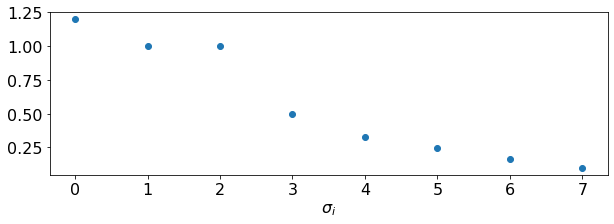

In [400]:
plt.plot(Σ, marker='o', lw=0)
plt.xlabel('$\sigma_i$')
plt.show()

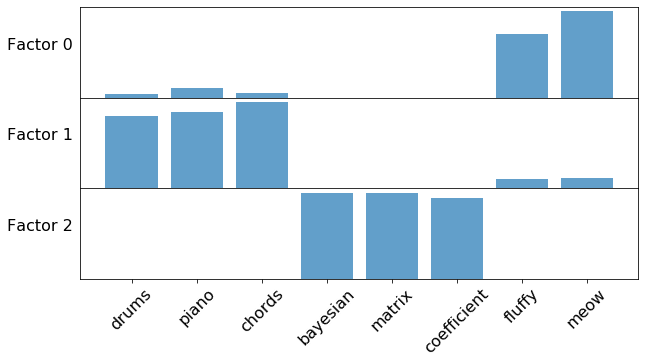

In [402]:
# Plot the principal basis vectors for the search terms

fig, axs = plt.subplots(3, sharex=True, figsize=(10, 5))
plt.subplots_adjust(hspace=0)

for i in range(3):
    plt.sca(axs[i])
    plt.bar(range(m), abs(U[:, i]), alpha=0.7)
    plt.yticks([])
    plt.ylabel('Factor {}'.format(i), rotation='horizontal', labelpad=40)
    
plt.xticks(range(m), words, rotation=45)
plt.show()

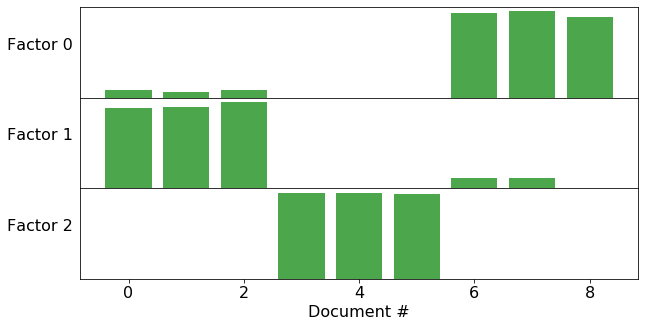

In [404]:
# Plot the principal basis vectors for the documents

fig, axs = plt.subplots(3, sharex=True, figsize=(10, 5))
plt.subplots_adjust(hspace=0)

for i in range(3):
    plt.sca(axs[i])
    plt.bar(range(n), abs(Vt.T[:, i]), color='g', alpha=0.7)
    plt.yticks([])
    plt.ylabel('Factor {}'.format(i), rotation='horizontal', labelpad=40)
    
plt.xlabel('Document #')
plt.show()

In [407]:
A_hat = U[:, :3] @ np.diag(Σ[:3]) @ Vt[:3, :]
A_hat /= np.linalg.norm(A_hat, axis=0)
np.round(A_hat, 2)

array([[ 0.53,  0.53,  0.53,  0.  ,  0.  ,  0.  , -0.02, -0.02,  0.03],
       [ 0.57,  0.57,  0.57,  0.  ,  0.  ,  0.  ,  0.04,  0.04,  0.09],
       [ 0.63,  0.63,  0.63, -0.  , -0.  , -0.  , -0.02, -0.02,  0.04],
       [ 0.  , -0.  , -0.  ,  0.59,  0.59,  0.59,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.  , -0.  ,  0.59,  0.59,  0.59, -0.  , -0.  ,  0.  ],
       [ 0.  , -0.  , -0.  ,  0.56,  0.56,  0.56,  0.  , -0.  ,  0.  ],
       [-0.  , -0.02, -0.  , -0.  , -0.  , -0.  ,  0.59,  0.59,  0.59],
       [ 0.01, -0.01,  0.01,  0.  ,  0.  ,  0.  ,  0.8 ,  0.8 ,  0.8 ]])

In [426]:
# Perform a search
search_term = 1
print('Searching for {}...\n'.format(words[search_term]))

# The search vector, x, is a vector of zeros with a '1' for the desired term. If we were to search for
# multiple words, we would normalize x to have unit norm
x = np.zeros(m)
x[search_term] = 1

# Compute the scores by projecting x onto each "document" (the columns of A_hat)
scores = abs(A_hat.T @ x)

# Sort the titles based on their scores, in descending order
rank = np.argsort(scores)[::-1]
sorted_titles = titles[rank]

# Print the results
for i in range(5):
    print(sorted_titles[i])
print('...')

Searching for piano...

Music Theory for Beginners
Beethoven vs. Mechagodzilla
A History of Jazz
Piano Cat Strikes Again
The Lost Art of Grooming
...
